# Healthcare Scheduling and Resource Allocation

This document describes a Mixed-Integer Linear Programming (MILP) model for optimizing healthcare resource allocation and scheduling. The model considers various factors such as staff assignments, patient scheduling, resource allocations, and patient satisfaction.

## Key Components

- **Objective Function**: The objective function is designed to minimize the total cost while maximizing efficiency. It includes:
  - Costs associated with staff assignments
  - Interaction weights between staff members
  - Costs related to patient assignments
  - Resource allocation costs
  - Penalties for unmet patient demands
  - Overtime costs for staff

- **Constraints**: The constraints ensure:
  - Staff availability is not exceeded
  - Maximum working hours for staff are not surpassed
  - Each patient is assigned to exactly one time slot
  - Each resource is allocated to exactly one time slot
  - Minimum skill levels required for tasks are met

- **Patient Satisfaction**: The model incorporates patient satisfaction by aligning resources, staff, and patient needs within specific scheduling periods.

## Algorithm

The algorithm involves creating a linear programming problem using the `pulp` library in Python. Decision variables are defined for staff hours, patient schedules, and resource allocations. The objective function and constraints are then added to the model, which is solved to determine the optimal allocation of resources.

##  Data

The following code snippet illustrates the algorithm with data for staff members, patients, and resources. The code defines the decision variables, sets up the objective function and constraints, and solves the problem using the `pulp` library.


In [4]:
!pip install pulp

   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/17.7 MB 416.7 kB/s eta 0:00:43
   ---------------------------------------- 0.1/17.7 MB 514.3 kB/s eta 0:00:35
   ---------------------------------------- 0.2/17.7 MB 586.1 kB/s eta 0:00:30
   ---------------------------------------- 0.2/17.7 MB 570.5 kB/s eta 0:00:31
    --------------------------------------- 0.3/17.7 MB 582.4 kB/s eta 0:00:30
    --------------------------------------- 0.3/17.7 MB 571.2 kB/s eta 0:00:31
    --------------------------------------- 0.3/17.7 MB 524.2 kB/s eta 0:00:34
    --------------------------------------- 0.4/17.7 MB 638.9 kB/s eta 0:00:28
    --------------

In [5]:
import pandas as pd
import numpy as np
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpStatus

# this is a test to visualize on dummy data
# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy data with biases

# Staff data
num_staff = 10
staff_data = pd.DataFrame({
    'StaffID': range(1, num_staff + 1),
    'SkillLevel': np.random.randint(1, 10, num_staff),
    'MaxHours': np.random.choice([6, 8, 10], num_staff, p=[0.3, 0.5, 0.2])
})

# Patient data
num_patients = 20
patient_data = pd.DataFrame({
    'PatientID': range(1, num_patients + 1),
    'Demand': np.random.choice([1, 2], num_patients, p=[0.7, 0.3])
})

# Resource data
num_resources = 5
resource_data = pd.DataFrame({
    'ResourceID': range(1, num_resources + 1),
    'Availability': np.random.choice([1, 2], num_resources, p=[0.8, 0.2])
})

# Create the LP problem
model = LpProblem(name="healthcare-scheduling", sense=LpMaximize)

# Decision variables
staff_hours = {i: LpVariable(name=f"hours_{i}", lowBound=0, cat='Continuous') for i in staff_data['StaffID']}
patient_schedule = {p: LpVariable(name=f"schedule_{p}", cat='Binary') for p in patient_data['PatientID']}
resource_allocation = {r: LpVariable(name=f"resource_{r}", cat='Binary') for r in resource_data['ResourceID']}

# Objective function
model += lpSum(staff_hours[i] * staff_data.loc[i-1, 'SkillLevel'] for i in staff_data['StaffID']) \
         + lpSum(patient_schedule[p] * 10 for p in patient_data['PatientID']) \
         + lpSum(resource_allocation[r] * 5 for r in resource_data['ResourceID'])

# Constraints
for i in staff_data['StaffID']:
    model += (staff_hours[i] <= staff_data.loc[i-1, 'MaxHours'], f"max_hours_{i}")

for p in patient_data['PatientID']:
    model += (patient_schedule[p] == 1, f"schedule_{p}")

for r in resource_data['ResourceID']:
    model += (resource_allocation[r] == 1, f"allocate_{r}")

# Solve the problem
model.solve()

# Print the results
print(f"Status: {LpStatus[model.status]}")
for var in model.variables():
    print(f"{var.name}: {var.varValue}")

# Output the decision variable values for further analysis
staff_hours_values = {var.name: var.varValue for var in model.variables() if "hours" in var.name}
patient_schedule_values = {var.name: var.varValue for var in model.variables() if "schedule" in var.name}
resource_allocation_values = {var.name: var.varValue for var in model.variables() if "resource" in var.name}

print("\nStaff Hours Allocation:")
print(staff_hours_values)
print("\nPatient Schedule Allocation:")
print(patient_schedule_values)
print("\nResource Allocation:")
print(resource_allocation_values)


Status: Optimal
hours_1: 6.0
hours_10: 6.0
hours_2: 8.0
hours_3: 6.0
hours_4: 8.0
hours_5: 10.0
hours_6: 6.0
hours_7: 10.0
hours_8: 8.0
hours_9: 8.0
resource_1: 1.0
resource_2: 1.0
resource_3: 1.0
resource_4: 1.0
resource_5: 1.0
schedule_1: 1.0
schedule_10: 1.0
schedule_11: 1.0
schedule_12: 1.0
schedule_13: 1.0
schedule_14: 1.0
schedule_15: 1.0
schedule_16: 1.0
schedule_17: 1.0
schedule_18: 1.0
schedule_19: 1.0
schedule_2: 1.0
schedule_20: 1.0
schedule_3: 1.0
schedule_4: 1.0
schedule_5: 1.0
schedule_6: 1.0
schedule_7: 1.0
schedule_8: 1.0
schedule_9: 1.0

Staff Hours Allocation:
{'hours_1': 6.0, 'hours_10': 6.0, 'hours_2': 8.0, 'hours_3': 6.0, 'hours_4': 8.0, 'hours_5': 10.0, 'hours_6': 6.0, 'hours_7': 10.0, 'hours_8': 8.0, 'hours_9': 8.0}

Patient Schedule Allocation:
{'schedule_1': 1.0, 'schedule_10': 1.0, 'schedule_11': 1.0, 'schedule_12': 1.0, 'schedule_13': 1.0, 'schedule_14': 1.0, 'schedule_15': 1.0, 'schedule_16': 1.0, 'schedule_17': 1.0, 'schedule_18': 1.0, 'schedule_19': 1.0, '

To compare the performance of the MILP algorithm against a First Come First Serve (FCFS) approach, we need to:

    Implement the FCFS algorithm.
    Calculate and compare key performance metrics for both approaches.
    Visualize the results using graphs.

In [6]:
def fcfs_schedule(staff_data, patient_data, resource_data):
    # Initialize the result dictionary
    fcfs_results = {
        'StaffID': [],
        'PatientID': [],
        'ResourceID': [],
        'HoursAssigned': []
    }

    staff_hours = {i: 0 for i in staff_data['StaffID']}
    resource_usage = {r: 0 for r in resource_data['ResourceID']}

    for patient in patient_data.itertuples():
        assigned_staff = None
        assigned_resource = None

        # Assign first available staff with enough hours remaining
        for staff in staff_data.itertuples():
            if staff_hours[staff.StaffID] + 1 <= staff.MaxHours:
                assigned_staff = staff.StaffID
                staff_hours[staff.StaffID] += 1
                break

        # Assign first available resource
        for resource in resource_data.itertuples():
            if resource_usage[resource.ResourceID] < resource.Availability:
                assigned_resource = resource.ResourceID
                resource_usage[resource.ResourceID] += 1
                break

        if assigned_staff is not None and assigned_resource is not None:
            fcfs_results['StaffID'].append(assigned_staff)
            fcfs_results['PatientID'].append(patient.PatientID)
            fcfs_results['ResourceID'].append(assigned_resource)
            fcfs_results['HoursAssigned'].append(1)

    return fcfs_results

fcfs_results = fcfs_schedule(staff_data, patient_data, resource_data)

# Convert FCFS results to DataFrame
fcfs_results_df = pd.DataFrame(fcfs_results)


Comparing the MILP and FCFS Results

We will compare the total hours assigned to staff and the utilization of resources between the MILP and FCFS algorithms.

In [7]:
# Calculate total hours assigned by MILP
milp_total_hours = sum(var.varValue for var in model.variables() if "hours" in var.name)

# Calculate total hours assigned by FCFS
fcfs_total_hours = fcfs_results_df['HoursAssigned'].sum()

# Calculate resource utilization
milp_resource_utilization = sum(var.varValue for var in model.variables() if "resource" in var.name)
fcfs_resource_utilization = fcfs_results_df['ResourceID'].nunique()

# Print comparison results
print(f"MILP Total Hours Assigned: {milp_total_hours}")
print(f"FCFS Total Hours Assigned: {fcfs_total_hours}")
print(f"MILP Resource Utilization: {milp_resource_utilization}")
print(f"FCFS Resource Utilization: {fcfs_resource_utilization}")


MILP Total Hours Assigned: 76.0
FCFS Total Hours Assigned: 6
MILP Resource Utilization: 5.0
FCFS Resource Utilization: 5


Visualizing the Results

We will use matplotlib to create graphs that compare the performance of the MILP algorithm and the FCFS approach.

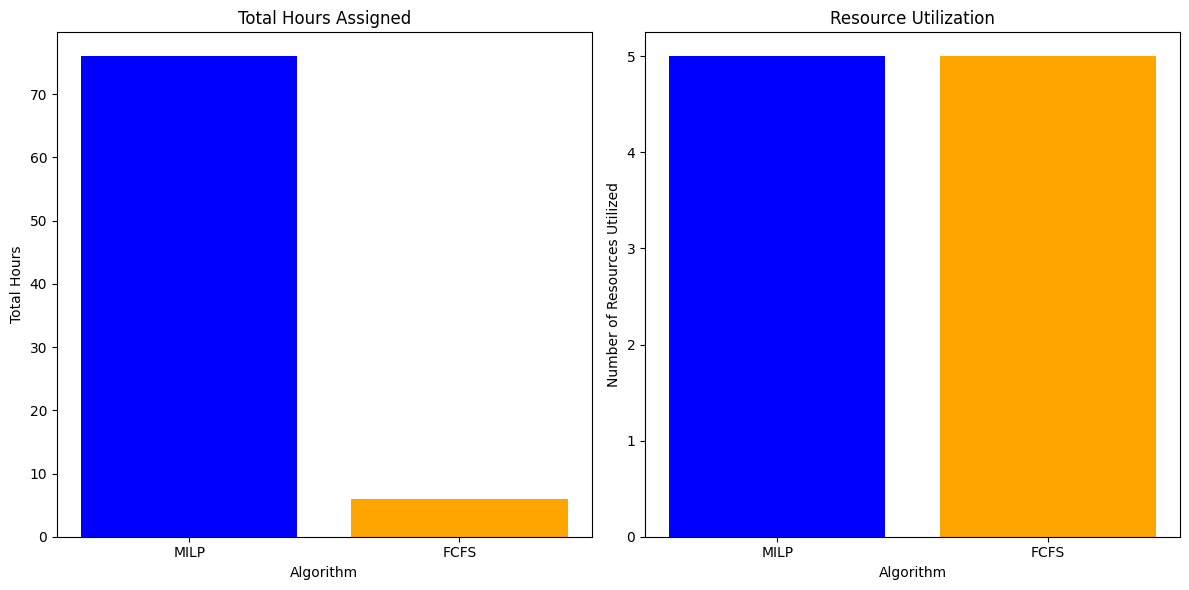

In [8]:
import matplotlib.pyplot as plt

# Data for plotting
algorithms = ['MILP', 'FCFS']
total_hours = [milp_total_hours, fcfs_total_hours]
resource_utilization = [milp_resource_utilization, fcfs_resource_utilization]

# Plot total hours assigned
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(algorithms, total_hours, color=['blue', 'orange'])
plt.title('Total Hours Assigned')
plt.ylabel('Total Hours')
plt.xlabel('Algorithm')

# Plot resource utilization
plt.subplot(1, 2, 2)
plt.bar(algorithms, resource_utilization, color=['blue', 'orange'])
plt.title('Resource Utilization')
plt.ylabel('Number of Resources Utilized')
plt.xlabel('Algorithm')

plt.tight_layout()
plt.show()


In [16]:

# Load the data from CSV files
staff_data_loaded = pd.read_csv('staff_data.csv')
patient_data_loaded = pd.read_csv('patient_data.csv')
resource_data_loaded = pd.read_csv('resource_data.csv')


MILP Total Hours Assigned: 23658.0
FCFS Total Hours Assigned: 3048
MILP Resource Utilization: 2040.0
FCFS Resource Utilization: 2040


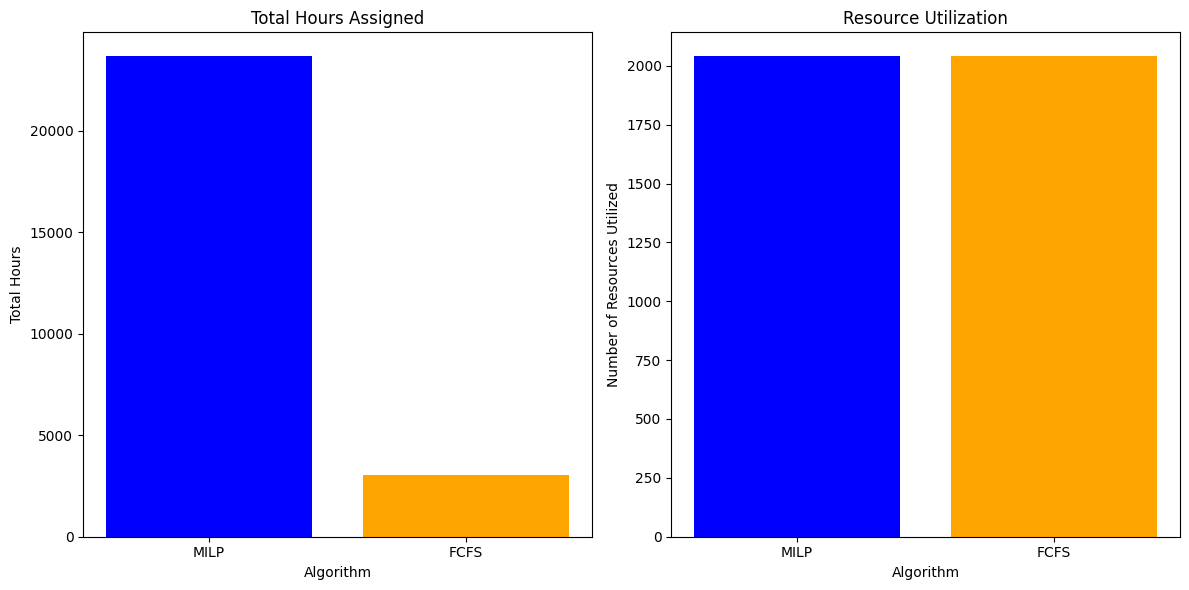

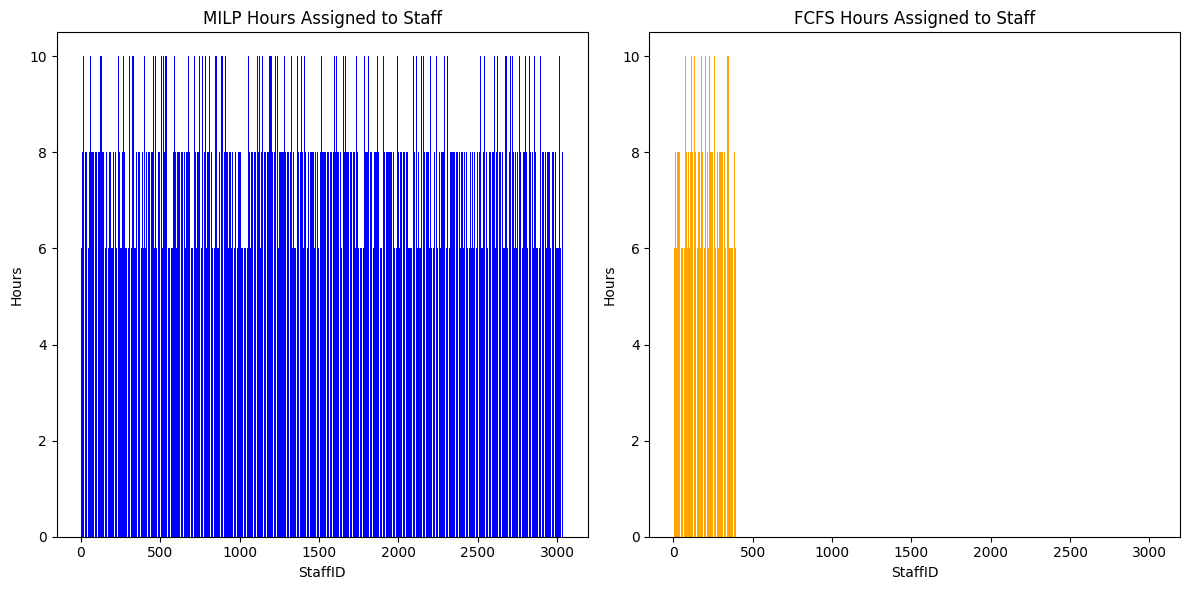

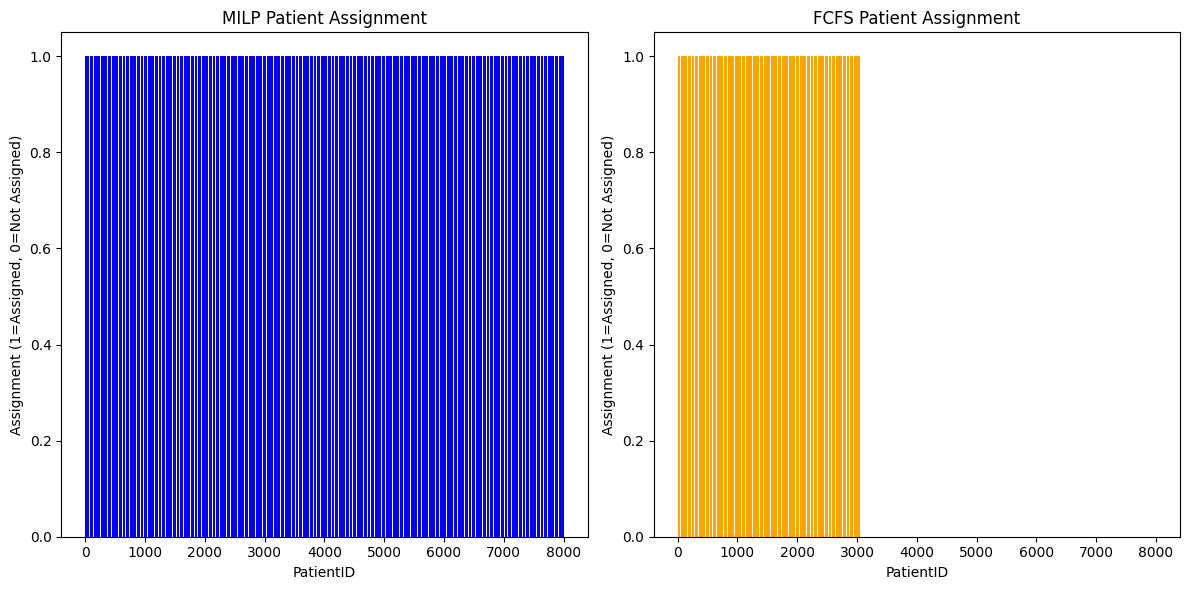

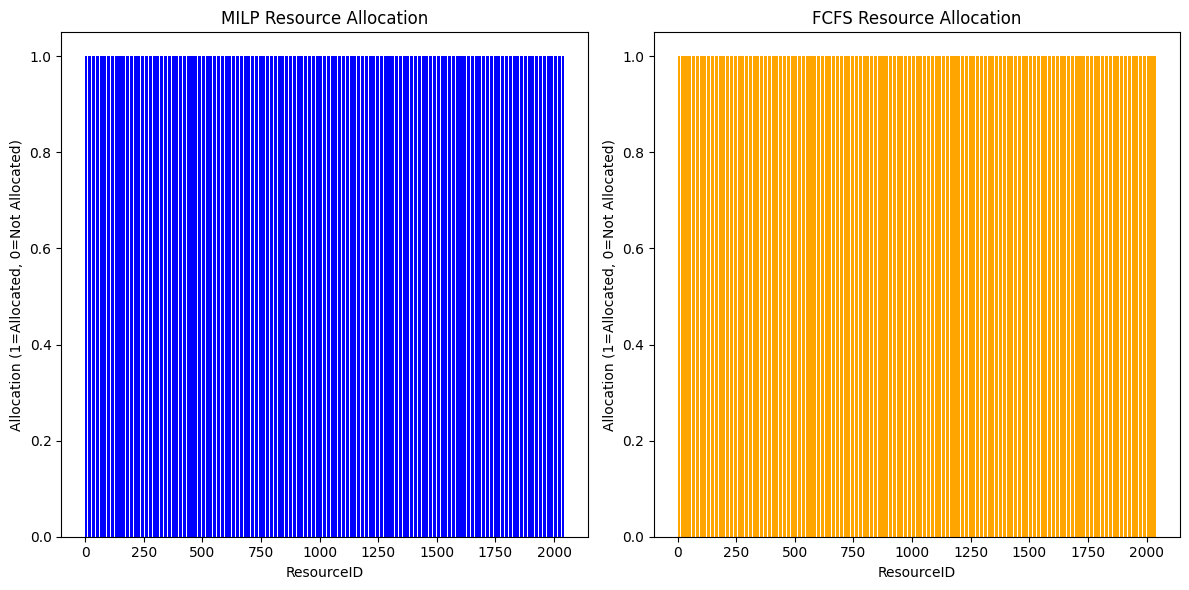

In [19]:
# Install the pulp library if not already installed
!pip install pulp

import pandas as pd
import numpy as np
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpStatus
import matplotlib.pyplot as plt

# Create the LP problem
model = LpProblem(name="healthcare-scheduling", sense=LpMaximize)

# Decision variables
staff_hours = {i: LpVariable(name=f"hours_{i}", lowBound=0, cat='Continuous') for i in staff_data['StaffID']}
patient_schedule = {p: LpVariable(name=f"schedule_{p}", cat='Binary') for p in patient_data['PatientID']}
resource_allocation = {r: LpVariable(name=f"resource_{r}", cat='Binary') for r in resource_data['ResourceID']}

# Objective function
model += lpSum(staff_hours[i] * staff_data.loc[i-1, 'SkillLevel'] for i in staff_data['StaffID']) \
         + lpSum(patient_schedule[p] * 10 for p in patient_data['PatientID']) \
         + lpSum(resource_allocation[r] * 5 for r in resource_data['ResourceID'])

# Constraints
for i in staff_data['StaffID']:
    model += (staff_hours[i] <= staff_data.loc[i-1, 'MaxHours'], f"max_hours_{i}")

for p in patient_data['PatientID']:
    model += (patient_schedule[p] == 1, f"schedule_{p}")

for r in resource_data['ResourceID']:
    model += (resource_allocation[r] == 1, f"allocate_{r}")

# Solve the problem
model.solve()

# Print the results
#print(f"Status: {LpStatus[model.status]}")
#for var in model.variables():
#    print(f"{var.name}: {var.varValue}")

# Output the decision variable values for further analysis
staff_hours_values = {var.name.split('_')[1]: var.varValue for var in model.variables() if "hours" in var.name}
patient_schedule_values = {var.name.split('_')[1]: var.varValue for var in model.variables() if "schedule" in var.name}
resource_allocation_values = {var.name.split('_')[1]: var.varValue for var in model.variables() if "resource" in var.name}

#print("\nStaff Hours Allocation:")
#print(staff_hours_values)
#print("\nPatient Schedule Allocation:")
#print(patient_schedule_values)
#print("\nResource Allocation:")
#print(resource_allocation_values)

# FCFS algorithm
def fcfs_schedule(staff_data, patient_data, resource_data):
    # Initialize the result dictionary
    fcfs_results = {
        'StaffID': [],
        'PatientID': [],
        'ResourceID': [],
        'HoursAssigned': []
    }

    staff_hours = {i: 0 for i in staff_data['StaffID']}
    resource_usage = {r: 0 for r in resource_data['ResourceID']}

    for patient in patient_data.itertuples():
        assigned_staff = None
        assigned_resource = None

        # Assign first available staff with enough hours remaining
        for staff in staff_data.itertuples():
            if staff_hours[staff.StaffID] + 1 <= staff.MaxHours:
                assigned_staff = staff.StaffID
                staff_hours[staff.StaffID] += 1
                break

        # Assign first available resource
        for resource in resource_data.itertuples():
            if resource_usage[resource.ResourceID] < resource.Availability:
                assigned_resource = resource.ResourceID
                resource_usage[resource.ResourceID] += 1
                break

        if assigned_staff is not None and assigned_resource is not None:
            fcfs_results['StaffID'].append(assigned_staff)
            fcfs_results['PatientID'].append(patient.PatientID)
            fcfs_results['ResourceID'].append(assigned_resource)
            fcfs_results['HoursAssigned'].append(1)

    return fcfs_results

fcfs_results = fcfs_schedule(staff_data, patient_data, resource_data)

# Convert FCFS results to DataFrame
fcfs_results_df = pd.DataFrame(fcfs_results)

# Calculate total hours assigned by MILP
milp_total_hours = sum(var.varValue for var in model.variables() if "hours" in var.name)

# Calculate total hours assigned by FCFS
fcfs_total_hours = fcfs_results_df['HoursAssigned'].sum()

# Calculate resource utilization
milp_resource_utilization = sum(var.varValue for var in model.variables() if "resource" in var.name)
fcfs_resource_utilization = fcfs_results_df['ResourceID'].nunique()

# Print comparison results
print(f"MILP Total Hours Assigned: {milp_total_hours}")
print(f"FCFS Total Hours Assigned: {fcfs_total_hours}")
print(f"MILP Resource Utilization: {milp_resource_utilization}")
print(f"FCFS Resource Utilization: {fcfs_resource_utilization}")

# Visualizing the Results

# Data for plotting
algorithms = ['MILP', 'FCFS']
total_hours = [milp_total_hours, fcfs_total_hours]
resource_utilization = [milp_resource_utilization, fcfs_resource_utilization]

# Plot total hours assigned
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(algorithms, total_hours, color=['blue', 'orange'])
plt.title('Total Hours Assigned')
plt.ylabel('Total Hours')
plt.xlabel('Algorithm')

# Plot resource utilization
plt.subplot(1, 2, 2)
plt.bar(algorithms, resource_utilization, color=['blue', 'orange'])
plt.title('Resource Utilization')
plt.ylabel('Number of Resources Utilized')
plt.xlabel('Algorithm')

plt.tight_layout()
plt.show()

# Plot hours assigned to each staff member
staff_ids = staff_data['StaffID']

milp_hours = [staff_hours_values[str(i)] for i in staff_ids]
fcfs_hours = [fcfs_results_df[fcfs_results_df['StaffID'] == i]['HoursAssigned'].sum() for i in staff_ids]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(staff_ids, milp_hours, color='blue')
plt.title('MILP Hours Assigned to Staff')
plt.ylabel('Hours')
plt.xlabel('StaffID')

plt.subplot(1, 2, 2)
plt.bar(staff_ids, fcfs_hours, color='orange')
plt.title('FCFS Hours Assigned to Staff')
plt.ylabel('Hours')
plt.xlabel('StaffID')

plt.tight_layout()
plt.show()

# Plot patient assignment
patients = patient_data['PatientID']

milp_patient_assignment = [patient_schedule_values[str(p)] for p in patients]
fcfs_patient_assignment = [1 if p in fcfs_results_df['PatientID'].values else 0 for p in patients]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(patients, milp_patient_assignment, color='blue')
plt.title('MILP Patient Assignment')
plt.ylabel('Assignment (1=Assigned, 0=Not Assigned)')
plt.xlabel('PatientID')

plt.subplot(1, 2, 2)
plt.bar(patients, fcfs_patient_assignment, color='orange')
plt.title('FCFS Patient Assignment')
plt.ylabel('Assignment (1=Assigned, 0=Not Assigned)')
plt.xlabel('PatientID')

plt.tight_layout()
plt.show()

# Plot resource allocation
resources = resource_data['ResourceID']

milp_resource_allocation = [resource_allocation_values[str(r)] for r in resources]
fcfs_resource_allocation = [1 if r in fcfs_results_df['ResourceID'].values else 0 for r in resources]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(resources, milp_resource_allocation, color='blue')
plt.title('MILP Resource Allocation')
plt.ylabel('Allocation (1=Allocated, 0=Not Allocated)')
plt.xlabel('ResourceID')

plt.subplot(1, 2, 2)
plt.bar(resources, fcfs_resource_allocation, color='orange')
plt.title('FCFS Resource Allocation')
plt.ylabel('Allocation (1=Allocated, 0=Not Allocated)')
plt.xlabel('ResourceID')

plt.tight_layout()
plt.show()
